### Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
cars_df = pd.read_csv('used_cars_data.csv')

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92539 entries, 0 to 92538
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             92539 non-null  object 
 1   city                  92539 non-null  object 
 2   city_fuel_economy     92539 non-null  float64
 3   daysonmarket          92539 non-null  int64  
 4   engine_displacement   92539 non-null  float64
 5   engine_type           92539 non-null  object 
 6   frame_damaged         92539 non-null  bool   
 7   fuel_type             92539 non-null  object 
 8   has_accidents         92539 non-null  bool   
 9   highway_fuel_economy  92539 non-null  float64
 10  horsepower            92539 non-null  float64
 11  isCab                 92539 non-null  bool   
 12  is_new                92539 non-null  bool   
 13  make_name             92539 non-null  object 
 14  maximum_seating       92539 non-null  object 
 15  mileage            

### Encoding the categorical variables - One-Hot Encoding

Applying one-hot encoding for the following reasons: 
1. to preserve the independence among categories,
2. compatibility with various algorithms that require numerical inputs
3. prevents misinterpretation of ordinal data 
4. offers flexibility in handling variable cardinality
5. avoids weighted averaging issues
6. remains robust to outliers
7. encourages non-linearity in models, making it a versatile choice for encoding categorical information in diverse machine learning applications

In [4]:
categorical_columns = cars_df.select_dtypes(include=['object', 'bool']).columns.tolist()

In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected columns - results in a matrix
encoded_data = encoder.fit_transform(cars_df[categorical_columns])

# Get feature names from the original dataframe
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Converting the matrix to dataframe
encoded_cars_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the original dataframe and the one-hot encoded dataframe
cars_df = pd.concat([cars_df, encoded_cars_df], axis=1)

# Drop the columns that were encoded
cars_df = cars_df.drop(columns=categorical_columns)

print(cars_df)

       city_fuel_economy  daysonmarket  engine_displacement  \
0                   18.0             7               3600.0   
1                   20.0            49               3000.0   
2                   25.0            17               2500.0   
3                   16.0           106               3600.0   
4                   27.0            12               1500.0   
...                  ...           ...                  ...   
92534               22.0            47               2000.0   
92535               27.0           193               2500.0   
92536               18.0            94               3200.0   
92537               22.0            12               1600.0   
92538               17.0            33               3500.0   

       highway_fuel_economy  horsepower   mileage  owner_count    price  year  \
0                      26.0       321.0   67925.0          1.0  20988.0  2014   
1                      30.0       335.0   32752.0          1.0  37395.0  2017   


### Creating a dataframe with feature variables

In [6]:
X = cars_df.drop('price',axis=1)
X.head()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,torque,body_type_Convertible,...,trim_name_xDrive35i Premium AWD,trim_name_xDrive35i Sport Activity AWD,trim_name_xDrive40i AWD,trim_name_xDrive48i AWD,trim_name_xDrive50i AWD,wheel_system_4WD,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,18.0,7,3600.0,26.0,321.0,67925.0,1.0,2014,275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,49,3000.0,30.0,335.0,32752.0,1.0,2017,332,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,17,2500.0,35.0,178.0,125477.0,2.0,2014,170,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16.0,106,3600.0,25.0,255.0,63871.0,3.0,2006,252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,27.0,12,1500.0,37.0,160.0,42977.0,2.0,2016,184,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Creating a dataframe with Target variable

The price values in our dataset exhibit significant imbalance due to the diverse range of cars included, spanning from low-end to luxury vehicles. To mitigate the impact of this imbalance on our modeling process, we apply a logarithmic transformation to the prices. This helps alleviate the skewness in the distribution, ensuring a more balanced representation of price variations across the entire spectrum of cars in the dataset.

In [7]:
cars_df['price'] = np.log(cars_df['price'])
y = cars_df['price']

# Decision Trees

### Calculating the feature importances for training a Decision Tree Regressor with our data: 

The feature importance in a DecisionTreeRegressor is calculated based on the reduction in impurity that each feature contributes to the decision tree.

For each node, the mean squared error is calculated for the target variable. Feature importance is then determined by how much each feature decreases the weighted average of the mean squared errors across all nodes in which the feature is used.

The calculation involves summing up the improvement in impurity (or decrease in error) over all the nodes where a particular feature is used to make a split. The more a feature reduces impurity, the more important it is considered.

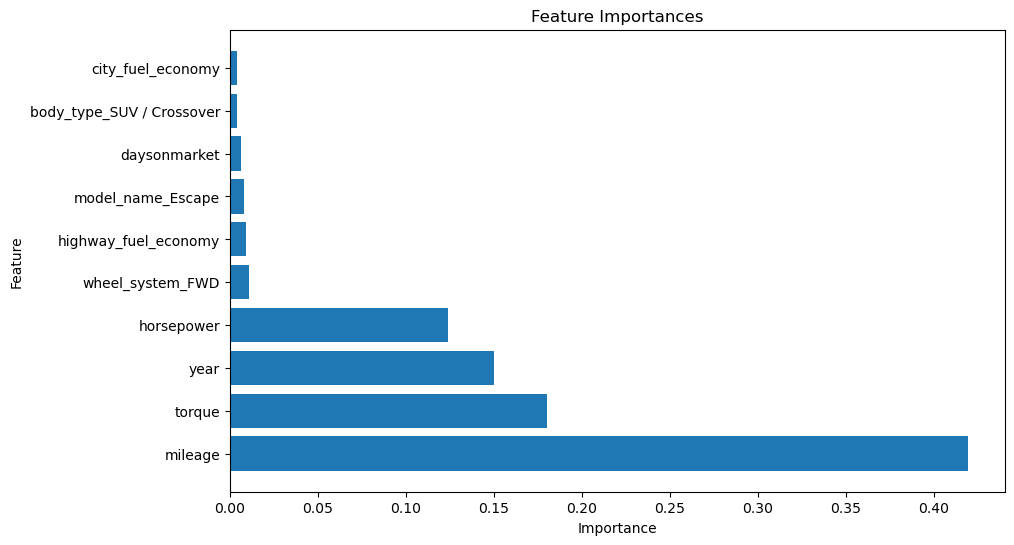

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Access feature importances
dt_feature_importances = dt_model.feature_importances_

# Create a DataFrame pairing features with their importances
dt_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_feature_importances})

# Sort the DataFrame by importance in descending order
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
#print("Feature Importances:")
#print(dt_feature_importance_df)

dt_top_10_features_df = dt_feature_importance_df.head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(dt_top_10_features_df['Feature'], dt_top_10_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


#### Taking into account the top 10 features that have high feature importance as a trade-off between predictive performance and model simplicity and computational power. 

In [9]:
dt_feature_importance_df.head(10)

,Feature,Importance
5,mileage,0.419323
8,torque,0.180358
7,year,0.149840
4,horsepower,0.123986
7814,wheel_system_FWD,0.010816
3,highway_fuel_economy,0.009059
4353,model_name_Escape,0.008290
1,daysonmarket,0.006534
12,body_type_SUV / Crossover,0.004353
0,city_fuel_economy,0.004033


In [10]:
dt_top_10_features_list = dt_feature_importance_df.head(10)['Feature'].tolist()

In [11]:
dt_top_10_features_list.remove('model_name_Escape')

In [12]:
dt_features = dt_top_10_features_list
X = cars_df[dt_features]
X.head()

,mileage,torque,year,horsepower,wheel_system_FWD,highway_fuel_economy,daysonmarket,body_type_SUV / Crossover,city_fuel_economy
0,67925.0,275,2014,321.0,0.0,26.0,7,0.0,18.0
1,32752.0,332,2017,335.0,0.0,30.0,49,0.0,20.0
2,125477.0,170,2014,178.0,1.0,35.0,17,0.0,25.0
3,63871.0,252,2006,255.0,0.0,25.0,106,0.0,16.0
4,42977.0,184,2016,160.0,1.0,37.0,12,0.0,27.0


### Decision Trees (without pruning)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(criterion='squared_error',random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Calculate and print the performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Decision Tree Training Set Mean Squared Error:", mse_train)
print("Decision Tree Training Set R-squared:", r2_train)

# Calculate and print the performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Decision Tree Testing Set Mean Squared Error:", mse_test)
print("Decision Tree Testing Set R-squared:", r2_test)

Decision Tree Training Set Mean Squared Error: 7.579902165598109e-12
Decision Tree Training Set R-squared: 0.9999999999771172
Decision Tree Testing Set Mean Squared Error: 0.039813674068667405
Decision Tree Testing Set R-squared: 0.8814942019323408


### Decision Trees (with pruning)

Using Randomized Search Cross-Validation technique for hyperparameter tuning to obtain the optimal parameters. The main idea behind RandomizedSearchCV is to efficiently explore a wide range of hyperparameter combinations by sampling only a subset of them, which can be especially useful when the hyperparameter search space is large.

In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': np.arange(5, 16),
    'min_samples_leaf': np.arange(2, 11)
}

random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Adjust the number of iterations
    cv=3,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print(random_search.best_params_)

{'min_samples_leaf': 8, 'max_depth': 15}


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-training the model with optimal parameters
dt_model = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_leaf= 9, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# Calculate and print the performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Decision Tree Training Set Mean Squared Error:", mse_train)
print("Decision Tree Training Set R-squared:", r2_train)

# Calculate and print the performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Decision Tree Testing Set Mean Squared Error:", mse_test)
print("Decision Tree Testing Set R-squared:", r2_test)

Decision Tree Training Set Mean Squared Error: 0.018606738746950072
Decision Tree Training Set R-squared: 0.9438284734516719
Decision Tree Testing Set Mean Squared Error: 0.029729653257820836
Decision Tree Testing Set R-squared: 0.9115093904793509


#### Visualizing the predictions

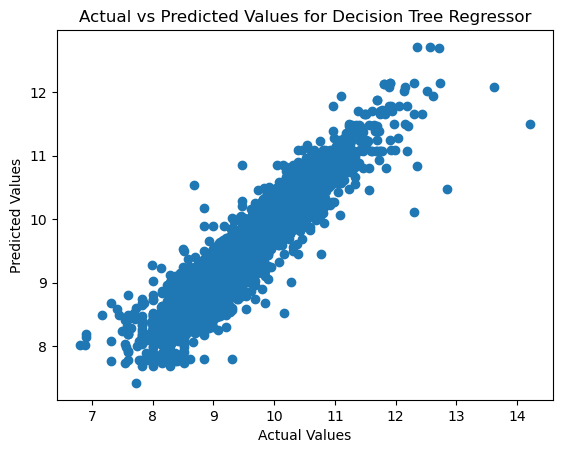

In [16]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regressor')
plt.show()

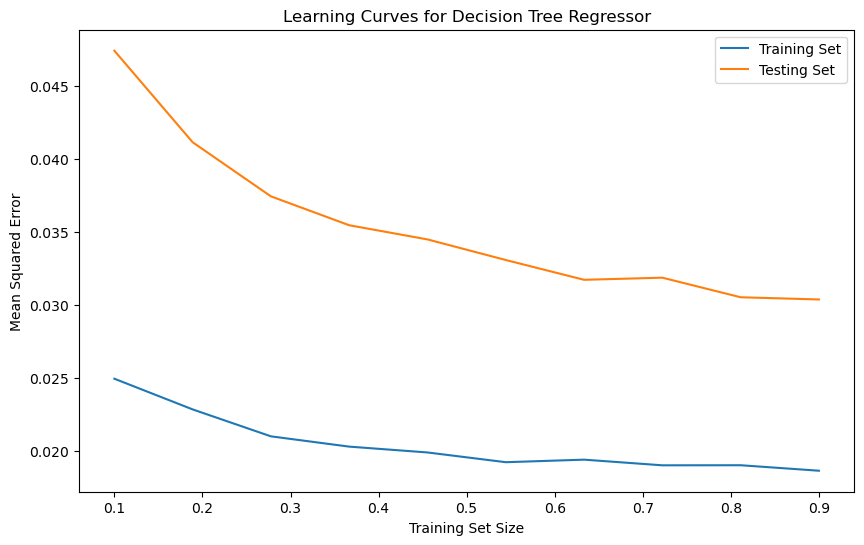

In [19]:
# Vary the size of the training set
train_sizes = np.linspace(0.1, 0.9, 10)

# Lists to store performance metrics
train_mse = []
test_mse = []

# Train the model with different training set sizes
for size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42, shuffle=True)
    
    dt_model.fit(X_train_subset, y_train_subset)
    
    # Predictions on both training and testing sets
    y_pred_train_subset = dt_model.predict(X_train_subset)
    y_pred_test_subset = dt_model.predict(X_test)
    
    # Calculate MSE for both training and testing sets
    train_mse.append(mean_squared_error(y_train_subset, y_pred_train_subset))
    test_mse.append(mean_squared_error(y_test, y_pred_test_subset))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Training Set')
plt.plot(train_sizes, test_mse, label='Testing Set')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Decision Tree Regressor')
plt.legend()
plt.show()


The learning curve indicates that the model is learning well from the training data but there is room for improvement. However, this is a conscious trade-off between performance and computational efficiency. 

# Random Forest Regressor

### Calculating the feature importances for training a Decision Tree Regressor with our data: 

In [20]:
X = cars_df.drop('price',axis=1)
X.head()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,mileage,owner_count,year,torque,body_type_Convertible,...,trim_name_xDrive35i Premium AWD,trim_name_xDrive35i Sport Activity AWD,trim_name_xDrive40i AWD,trim_name_xDrive48i AWD,trim_name_xDrive50i AWD,wheel_system_4WD,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,18.0,7,3600.0,26.0,321.0,67925.0,1.0,2014,275,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,49,3000.0,30.0,335.0,32752.0,1.0,2017,332,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,17,2500.0,35.0,178.0,125477.0,2.0,2014,170,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16.0,106,3600.0,25.0,255.0,63871.0,3.0,2006,252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,27.0,12,1500.0,37.0,160.0,42977.0,2.0,2016,184,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
cars_df['price'] = np.log(cars_df['price'])
y = cars_df['price']

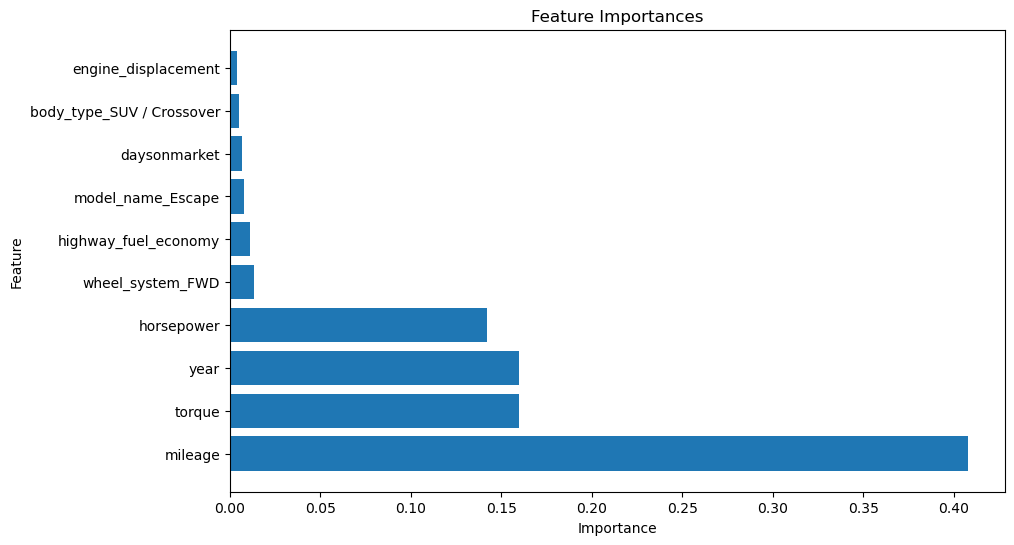

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Access feature importances
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame pairing features with their importances
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})

# Sort the DataFrame by importance in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

rf_top_10_features_df = rf_feature_importance_df.head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_top_10_features_df['Feature'], rf_top_10_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Taking into account the top 10 features that have high feature importance as a trade-off between predictive performance and model simplicity and computational power.

In [10]:
rf_top_10_features_list = rf_feature_importance_df.head(10)['Feature'].tolist()
rf_top_10_features_list.remove('model_name_Escape')
rf_features = rf_top_10_features_list
rf_features
X = cars_df[rf_features]
X.head()

,mileage,torque,year,horsepower,wheel_system_FWD,highway_fuel_economy,daysonmarket,body_type_SUV / Crossover,engine_displacement
0,67925.0,275,2014,321.0,0.0,26.0,7,0.0,3600.0
1,32752.0,332,2017,335.0,0.0,30.0,49,0.0,3000.0
2,125477.0,170,2014,178.0,1.0,35.0,17,0.0,2500.0
3,63871.0,252,2006,255.0,0.0,25.0,106,0.0,3600.0
4,42977.0,184,2016,160.0,1.0,37.0,12,0.0,1500.0


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate and print the performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Random Forest Training Set Mean Squared Error:", mse_train)
print("Random Forest Training Set R-squared:", r2_train)

# Calculate and print the performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Random Forest Testing Set Mean Squared Error:", mse_test)
print("Random Forest Testing Set R-squared:", r2_test)


Random Forest Training Set Mean Squared Error: 3.3510881053938935e-05
Random Forest Training Set R-squared: 0.9905764778879963
Random Forest Testing Set Mean Squared Error: 0.00024177966230857714
Random Forest Testing Set R-squared: 0.9328998704763384


### Hyperparameter tuning the Random Forest Regressor

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters
param_dist = {
    'n_estimators': np.arange(100,150, 50),
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
}

# Use Randomized Search to find the best combination of hyperparameters
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=2, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters from the randomized search
best_params = random_search.best_params_

# Create and train a Random Forest Regressor model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Calculate the R-squared score

print("Best Hyperparameters:", best_params)

# Calculate and print the performance on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Random Forest Training Set Mean Squared Error:", mse_train)
print("Random Forest Training Set R-squared:", r2_train)

# Calculate and print the performance on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Random Forest Testing Set Mean Squared Error:", mse_test)
print("Random Forest Testing Set R-squared:", r2_test)


/Users/amruthapurnavadrevu/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Training Set Mean Squared Error: 0.00745919188542452
Random Forest Training Set R-squared: 0.9774815887555859
Random Forest Testing Set Mean Squared Error: 0.02084970218677864
Random Forest Testing Set R-squared: 0.9379406534333966


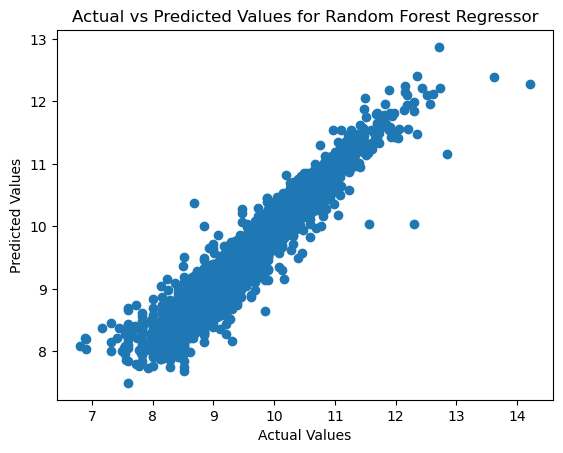

In [17]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.show()

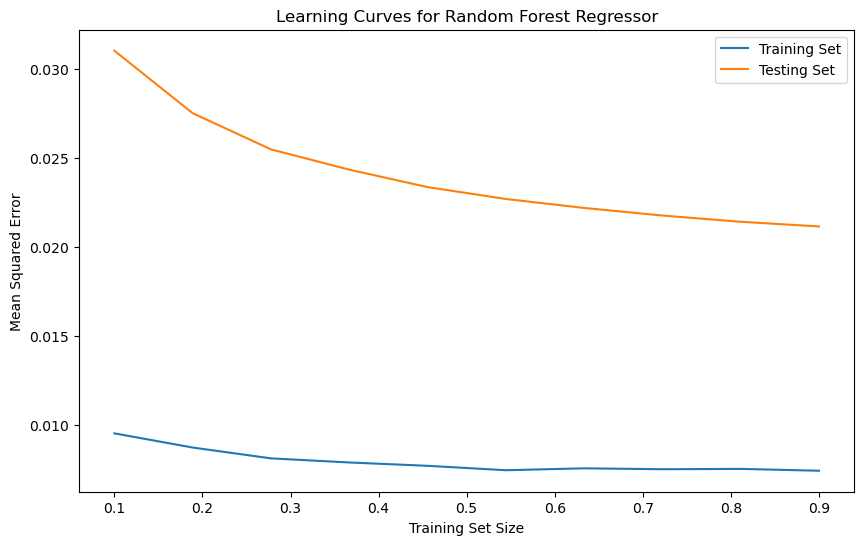

In [15]:
# Vary the size of the training set
train_sizes = np.linspace(0.1, 0.9, 10)

# Lists to store performance metrics
train_mse = []
test_mse = []

# Train the model with different training set sizes
for size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42, shuffle=True)
    
    best_rf_model.fit(X_train_subset, y_train_subset)
    
    # Predictions on both training and testing sets
    y_pred_train_subset = best_rf_model.predict(X_train_subset)
    y_pred_test_subset = best_rf_model.predict(X_test)
    
    # Calculate MSE for both training and testing sets
    train_mse.append(mean_squared_error(y_train_subset, y_pred_train_subset))
    test_mse.append(mean_squared_error(y_test, y_pred_test_subset))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Training Set')
plt.plot(train_sizes, test_mse, label='Testing Set')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Random Forest Regressor')
plt.legend()
plt.show()


### Visualizing a part of the Random Forest Regressor

In [45]:
from sklearn.tree import export_graphviz
import graphviz

# Choose a tree from the trained Random Forest model (e.g., the first tree)
tree_to_visualize = best_rf_model.estimators_[0]

# Export the tree to a DOT file
dot_data = export_graphviz(tree_to_visualize, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree") # Gets saved as a PDF file

'random_forest_tree.pdf'

#### Visualizing a part of the tree

In [46]:
tree_to_visualize = best_rf_model.estimators_[0]

max_depth_to_visualize = 3

# Export the tree to a DOT file
dot_data = export_graphviz(tree_to_visualize, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True, 
                          max_depth=max_depth_to_visualize)  

# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree_part") # Gets saved as a PDF file

'random_forest_tree_part.pdf'